/home/esteban/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


dataset size:  146
	Epoch 1 	Average Loss: 151.30510272979737
	Epoch 2 	Average Loss: 57.435250473022464


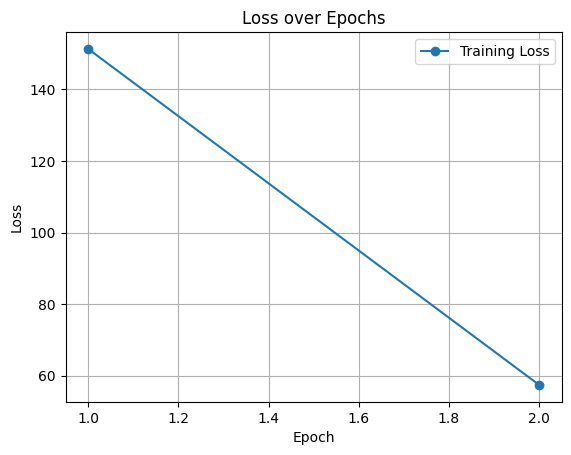

Training complete. Best model saved to models/fire_multiscale//best_model.pth and the latest model saved to models/fire_multiscale//last_model.pth
	Epoch 1 	Average Loss: 11.2715576171875
	Epoch 2 	Average Loss: 18.6838809967041


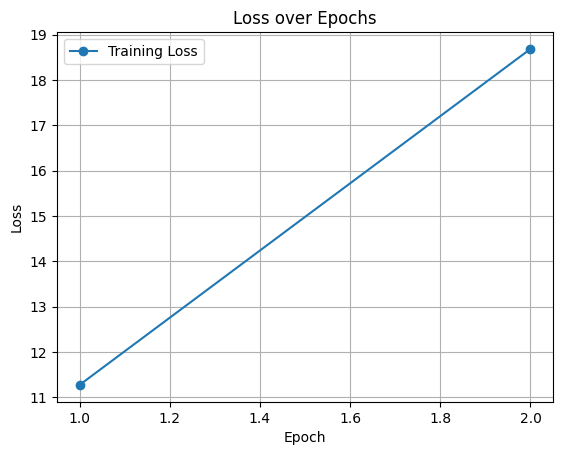

Training complete. Best model saved to models/fire_statistics//best_model.pth and the latest model saved to models/fire_statistics//last_model.pth


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from modules.dataset import *
from modules.seeds import *
from modules.architecture import *
from modules.trainer import *

audio_path = 'sounds/fire_clean_augmented.wav'

frame_size, N_filter_bank, param_per_env = 17640, 24, 512
hidden_size, deepness = 1024, 2
latent_dim = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sr = 44100
seed = seed_maker(frame_size, sr, N_filter_bank)
seed = seed.to(device)

settings = {
    'hidden_size': hidden_size,
    'deepness': deepness,
    'latent_dim': latent_dim,
    'N_filter_bank': N_filter_bank,
    'param_per_env': param_per_env,
    }

#Dataset loading
dataset = VAE_Dataset(audio_path, frame_size, sr, N_filter_bank)
dataset_list = dataset.compute_dataset()
print("dataset size: ", len(dataset_list))
dataloader = DataLoader(dataset_list, batch_size=32, shuffle=True)

#Model loading
modelo = VAE_SubEnv(hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed, device)

#Optimizer
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

#Training
model_path = 'models/fire_multiscale/'
train_multiscale_loss(modelo, optimizer, 2, device, dataloader, model_path, settings)
model_path = 'models/fire_statistics/'
train_statistics_loss(modelo, optimizer, 2, device, dataloader, model_path, N_filter_bank, frame_size, sr, settings)

dataset size:  38
	Epoch 1 	Average Loss: 33.3425407409668
	Epoch 2 	Average Loss: 56.729798316955566


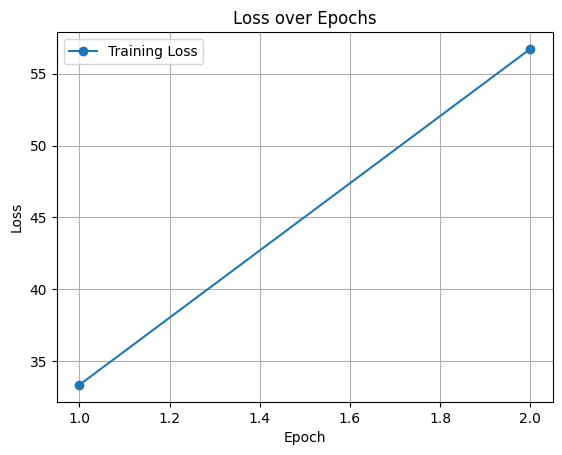

Training complete. Best model saved to models/water_multiscale//best_model.pth and the latest model saved to models/water_multiscale//last_model.pth
	Epoch 1 	Average Loss: 63.433393478393555
	Epoch 2 	Average Loss: 69.41609382629395


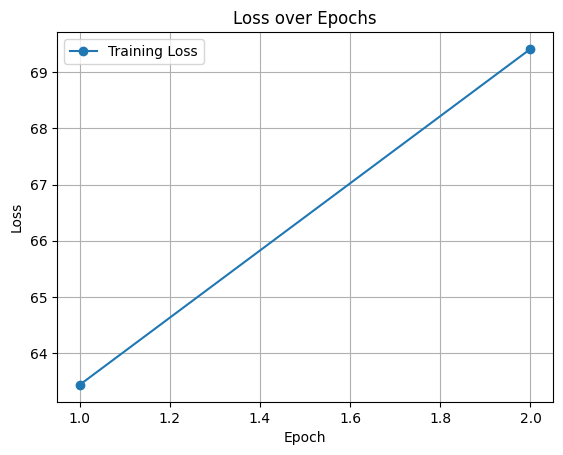

Training complete. Best model saved to models/water_statistics//best_model.pth and the latest model saved to models/water_statistics//last_model.pth


In [2]:
audio_path = 'sounds/water_augmented.wav'

frame_size, N_filter_bank, param_per_env = 17640, 16, 256
hidden_size, deepness = 512, 2
latent_dim = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sr = 44100
seed = seed_maker(frame_size, sr, N_filter_bank)
seed = seed.to(device)

settings = {
    'hidden_size': hidden_size,
    'deepness': deepness,
    'latent_dim': latent_dim,
    'N_filter_bank': N_filter_bank,
    'param_per_env': param_per_env,
    }

#Dataset loading
dataset = VAE_Dataset(audio_path, frame_size, sr, N_filter_bank)
dataset_list = dataset.compute_dataset()
print("dataset size: ", len(dataset_list))
dataloader = DataLoader(dataset_list, batch_size=32, shuffle=True)

#Model loading
modelo = VAE_SubEnv(hidden_size, deepness, latent_dim, N_filter_bank, param_per_env, seed, device)

#Optimizer
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

#Training
model_path = 'models/water_multiscale/'
train_multiscale_loss(modelo, optimizer, 2, device, dataloader, model_path, settings)
model_path = 'models/water_statistics/'
train_statistics_loss(modelo, optimizer, 2, device, dataloader, model_path, N_filter_bank, frame_size, sr, settings)